In [147]:
#importación de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pd.set_option('display.max_columns', None) #para que muestre todas las columnas

In [148]:
#lectura de archivos csv y creación de dataframes

df_flight = pd.read_csv('Customer Flight Activity.csv', index_col='Loyalty Number')
df_loyalty = pd. read_csv('Customer Loyalty History.csv',index_col='Loyalty Number')

In [149]:
#vista inicial de los datos de df_flight

df_flight.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [150]:
#informacioón de los datos de df_flight

df_flight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 30.9 MB


In [151]:
def buscar_nulos_percent(nombre_df):
    """
    Función que busca los valores nulos y muestra el porcentaje de nulos
    """
    nulos = nombre_df.isnull().sum()
    porcentaje_nulos = (nulos/len(nombre_df))*100
    return porcentaje_nulos

In [152]:
buscar_nulos_percent(df_flight) #no hay valores nulos

Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [153]:
#este df tiene una cantidad alta de filas duplicadas

df_flight.duplicated().sum()

np.int64(228705)

In [154]:
#vemos que muchos Loyalty Numbers están repetidos

df_flight.index.value_counts()


Loyalty Number
678205    72
499874    48
411734    48
255475    48
528447    48
          ..
100590    24
100642    24
100644    24
100646    24
999891    24
Name: count, Length: 16737, dtype: int64

In [155]:
#Explorar la naturaleza de los datos repetidos. Se ven filas duplicadas (para drop) y filas con datos diferentes pero el mismo Loyalty Number (para mantener)

loyalty_678205   = df_flight[df_flight.index == 678205 ]
loyalty_678205 


,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
678205,2017,1,0,0,0,0,0.0,0,0
678205,2017,1,0,0,0,0,0.0,0,0
678205,2017,1,0,0,0,0,0.0,0,0
678205,2017,2,0,0,0,0,0.0,0,0
678205,2017,2,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
678205,2018,11,11,0,11,1177,117.0,0,0
678205,2018,11,8,1,9,1341,134.0,0,0
678205,2018,12,0,0,0,0,0.0,0,0


In [156]:
#vista inicial de los datos de df_loyalty

df_loyalty.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [157]:
#información de los datos de df_loyalty

df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 480934 to 652627
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16737 non-null  object 
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 2.0

In [158]:
buscar_nulos_percent(df_loyalty)

Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [159]:
#este df no tiene filas dupllicadas

df_loyalty.duplicated().sum()

np.int64(0)

In [160]:
df = df_flight.merge(df_loyalty,on = "Loyalty Number", how="left") #left join to keep all the rows of df_flight
df.sample(5)

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
610946,2018,11,9,3,12,3192,319.0,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,56947.0,Married,Star,4244.47,Standard,2016,12,NaN,NaN
532945,2017,3,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Single,Nova,4159.59,2018 Promotion,2018,2,2018.0,10.0
530436,2017,7,0,0,0,0,0.0,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,46663.0,Married,Nova,3252.83,Standard,2015,10,NaN,NaN
172983,2018,8,15,0,15,2505,250.0,0,0,Canada,Alberta,Banff,T4V 1D4,Male,College,NaN,Divorced,Star,6846.15,Standard,2017,5,NaN,NaN
486897,2017,2,3,1,4,2352,235.0,0,0,Canada,Ontario,Kingston,M9K 2P4,Female,Bachelor,70749.0,Single,Star,23331.83,2018 Promotion,2018,3,NaN,NaN


## Exploración General del DataFrame despues de unir las tablas

In [161]:
df.shape

(405624, 24)

In [162]:
#evaluación de valores nulos

buscar_nulos_percent(df)

Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.312112
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Month             87.657535
dtype: float64

In [163]:
df.index.value_counts() #hay Loyalty Numbers repetidos

Loyalty Number
678205    72
499874    48
411734    48
255475    48
528447    48
          ..
100590    24
100642    24
100644    24
100646    24
999891    24
Name: count, Length: 16737, dtype: int64

In [164]:
loyalty_678205  = df[df.index == 678205 ] #para visualizar como se ven los datos de un Loyalty Number. Hay meses repetidos pero no son todos filas enteras repetidas
loyalty_678205 

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
678205,2017,1,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
678205,2017,1,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
678205,2017,1,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
678205,2017,2,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
678205,2017,2,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678205,2018,11,11,0,11,1177,117.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
678205,2018,11,8,1,9,1341,134.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
678205,2018,12,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN


In [165]:
df.describe().T #resumen stats de columnas numéricas    

,count,mean,std,min,25%,50%,75%,max
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00
Salary,302952.0,79268.825953,34992.133508,-58486.00,59262.00,73479.00,88612.00,407228.00


In [166]:
df.describe(include='object').T #resumen stats de columnas categóricas

,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
 9   Country                      405624 non-null  object 
 10  Province                     405624 non-null  object 
 11  City                         405624 non-null  object 
 12  Postal Code                  405624 non-null  object 
 13 

## Limpieza
- Eliminar columnas Cancellation Month y Cancellation year (debido al porcentaje de nulos)
- tratar los nulos en la columna (salario)
- Evaluar salarios en negativo
- eliminar duplicados
- Cambiar digitos a nombre de mes


In [168]:
df.duplicated().sum()

np.int64(1864)

In [169]:
df.drop_duplicates(inplace=True)
df.duplicated().sum() #comprobamos que se eliminaron las filas duplicadas

np.int64(0)

In [170]:
drop_columns= ['Cancellation Year', 'Cancellation Month'] #eliminar columnas con 87% de nulos

df.drop(drop_columns, axis=1, inplace=True)

In [213]:
df.shape

(403760, 22)

In [171]:
df_salaries = np.sort(df['Salary'].unique()) #para ver los valores únicos de la columna Salary, para identificar valores negativos

df_salaries

array([-58486., -57297., -49830., ..., 397919., 407228.,     nan],
      shape=(5891,))

In [172]:
df['Salary'] = df['Salary'].abs()

df_salaries = np.sort(df['Salary'].unique()) #comprobar que se han cambiado los valores negativos

df_salaries

array([  9081.,  10605.,  12497., ..., 397919., 407228.,     nan],
      shape=(5891,))

In [173]:
#para tratar los nulos en salary: hay un 25% de nulos. Opto por tratar con Iterative Imputer.

imputer = IterativeImputer(max_iter=100, random_state=42)
df['Salary'] = imputer.fit_transform(df[['Salary']])

In [174]:
buscar_nulos_percent(df) #ya no hay nulos en Salary

Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
Country                        0.0
Province                       0.0
City                           0.0
Postal Code                    0.0
Gender                         0.0
Education                      0.0
Salary                         0.0
Marital Status                 0.0
Loyalty Card                   0.0
CLV                            0.0
Enrollment Type                0.0
Enrollment Year                0.0
Enrollment Month               0.0
dtype: float64

In [175]:
# Crea un diccionario para mapear los valores.
diccionario_meses = {
    1: "January",  2: "February",  3: "March",     4: "April",
    5: "May",      6: "June",      7: "July",      8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"}


columns_to_map = ["Month", "Enrollment Month"]  # List of columns to transform

df[columns_to_map] = df[columns_to_map].replace(diccionario_meses)


# Aplica el diccionario de mapeo a la columna 'remote_work' para convertir sus valores a "No" y "Yes".


# Muestra los valores únicos de la columna 'remote_work' después del cambio.
df['Month'].unique()


array(['January', 'September', 'February', 'March', 'November', 'April',
       'May', 'July', 'June', 'August', 'October', 'December'],
      dtype=object)

In [176]:
df['Enrollment Month'].unique()

array(['August', 'March', 'July', 'January', 'September', 'May',
       'October', 'February', 'April', 'June', 'November', 'December'],
      dtype=object)

## Fase 2: Visualización

1.  ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

El gráfico abajo traza la tendencia de vuelos reservados en cada mes del año. Suma el número total de vuelvos reservados en cada mes (ej. enero 2017 y enero 2018 sumado)

In [251]:
df_flights_month = df.groupby(['Month', 'Year'])['Flights Booked'].sum().reset_index()

df_flights_month

C:\Users\Kathe\AppData\Local\Temp\ipykernel_15644\4202550012.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_flights_month = df.groupby(['Month', 'Year'])['Flights Booked'].sum().reset_index()


,Month,Year,Flights Booked
0,January,2017,47766
1,January,2018,49170
2,February,2017,47691
3,February,2018,48643
4,March,2017,64271
5,March,2018,66928
6,April,2017,55720
7,April,2018,56791
8,May,2017,65279
9,May,2018,76891


Text(0.5, 1.0, 'Flights Booked by Month')

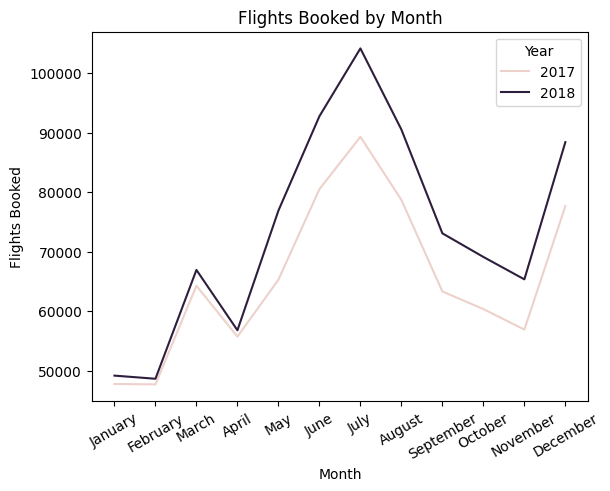

In [253]:
sns.lineplot(data=df_flights_month, x='Month', y='Flights Booked', hue='Year')
plt.tick_params(axis='x', rotation=30)
plt.title('Flights Booked by Month')

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

El gráfico abajo muestra una fuerte correlación positiva entre la distancia del vuelo y los puntos acumulados. Esta observación va avalada por la tabla a continuación que muestra el coeficiente de correlación por encima de .99. 

Text(0.5, 1.0, 'Distance vs. Points Accumulated')

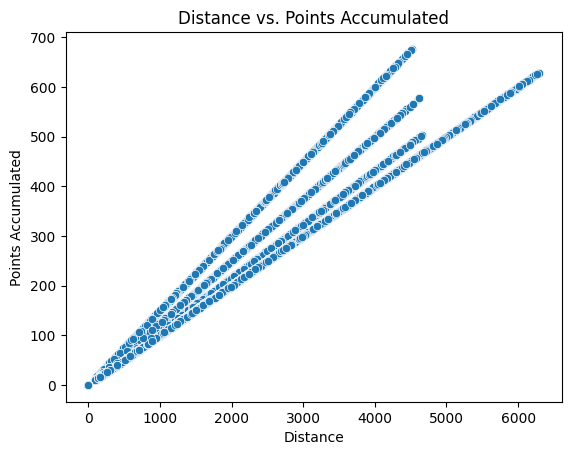

In [185]:
sns.scatterplot(data=df, x='Distance', y='Points Accumulated')
plt.title('Distance vs. Points Accumulated')

In [186]:
df[["Distance", "Points Accumulated"]].corr()

,Distance,Points Accumulated
Distance,1.000000,0.994546
Points Accumulated,0.994546,1.000000


3. ¿Cuál es la distribución de los clientes por provincia o estado?

El gráfico abajo demuestra la distribución por provincia. Predomina Ontario, British Columbia y Quebec. 

In [220]:
# Reset index to treat Loyalty Number as a column
df_reset = df.reset_index()

# Group by Province and sum the Loyalty Numbers using nunique instead of size to count only unique values
df_province = df_reset.groupby('Province')['Loyalty Number'].nunique().reset_index()

df_province.columns = ["Province", "conteo"] #the column headers I want to see

# Display the result
df_province_sorted= df_province.sort_values(by='conteo', ascending=False)


Text(0.5, 1.0, 'Clientes por provincia')

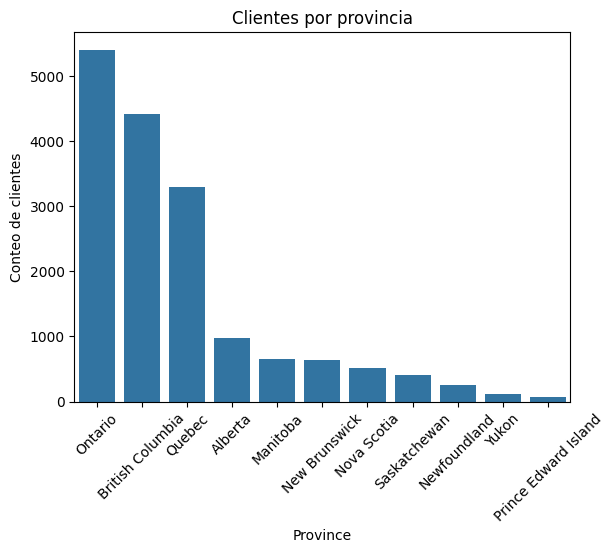

In [223]:
sns.barplot(data=df_province, x='Province', y ='conteo', order=df_province_sorted['Province'])
plt.tick_params(axis='x', rotation=45)
plt.ylabel('Conteo de clientes')
plt.title('Clientes por provincia')

In [226]:
df['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Hay una relación clara y positiva entre el nivel de educación del cliente y el salario promedio. 

Text(0.5, 1.0, 'Level of Education vs. Salary')

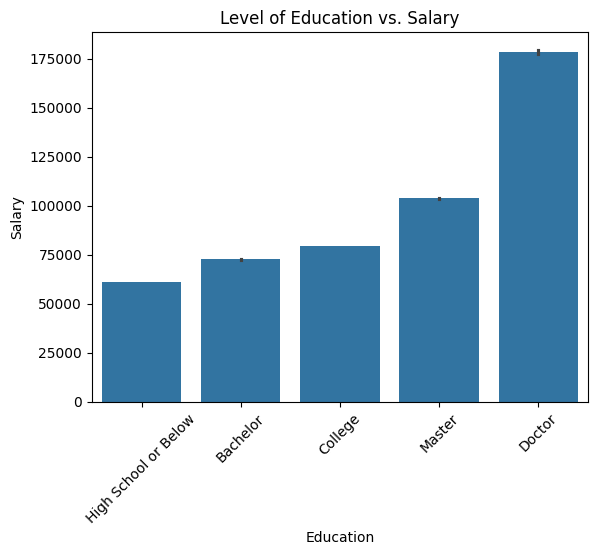

In [233]:
order_education = ['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']

sns.barplot(data=df, x='Education', y='Salary', order=order_education)
plt.tick_params(axis='x', rotation=45)
plt.title('Level of Education vs. Salary')

In [ ]:
df.columns

df_education = df.groupby('education')["id"].count().reset_index()
df_education

Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed', 'Country', 'Province', 'City',
       'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status',
       'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year',
       'Enrollment Month'],
      dtype='object')

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

Se puede ver en el pie chart abajo:

Nova: 33.9%

Aurora: 20.5%

Star:45.6%

In [237]:
# Reset index to treat Loyalty Number as a column
df_reset = df.reset_index()

# Group by 'Loyalty Card' and count unique 'Loyalty Number' values
df_fidelidad = df_reset.groupby('Loyalty Card')['Loyalty Number'].nunique().reset_index()

# Rename the columns to 'Loyalty Card' and 'conteo'
df_fidelidad.columns = ['Loyalty Card', 'conteo']

# Display the result
df_fidelidad


,Loyalty Card,conteo
0,Aurora,3429
1,Nova,5671
2,Star,7637


Text(0.5, 1.0, 'Clientes con tarjeta de fidelidad')

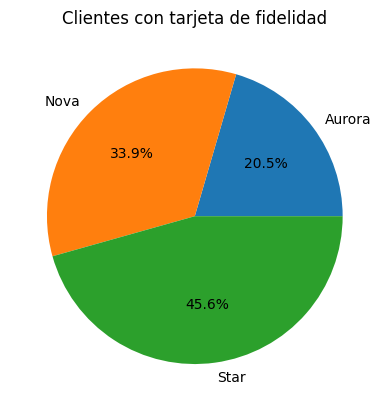

In [239]:
plt.pie(df_fidelidad['conteo'], labels=df_fidelidad['Loyalty Card'], autopct='%1.1f%%')
plt.title('Clientes con tarjeta de fidelidad')

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [247]:
# Reset index to treat Loyalty Number as a column
df_reset = df.reset_index()

df_dist_clientes = df_reset.groupby(['Gender', 'Marital Status'])['Loyalty Number'].nunique().reset_index()

df_dist_clientes.columns = ['Gender', 'Marital Status', 'Conteo']

df_dist_clientes

,Gender,Marital Status,Conteo
0,Female,Divorced,1269
1,Female,Married,4869
2,Female,Single,2272
3,Male,Divorced,1249
4,Male,Married,4866
5,Male,Single,2212


Text(0, 0.5, 'Number of Clients')

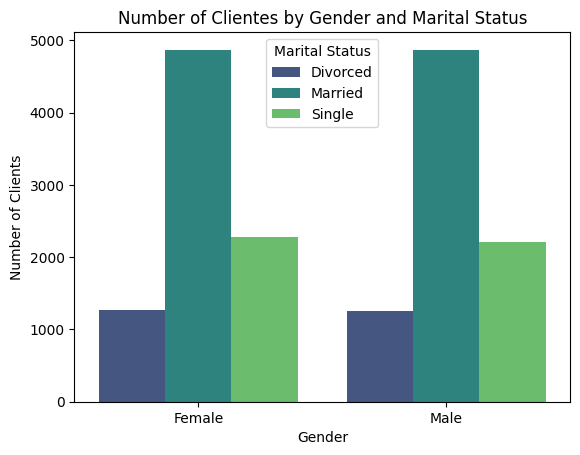

In [248]:
sns.barplot(data=df_dist_clientes, x='Gender', y='Conteo', hue='Marital Status', palette='viridis')

# Add title and labels
plt.title('Number of Clientes by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Number of Clients')


